In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import joblib

data_path = 'calorie.csv'
data = pd.read_csv(data_path)

data.head()

Weights   90  108  126    0
0      Water Aerobics  120  144  168  1.0
1          Hatha Yoga  120  144  168  NaN
2        Calisthenics  135  162  189  NaN
3            Aerobics  165  198  231  1.0
4  Stair Step Machine  180  216  252  1.0

In [59]:
data.tail()

Weights   90  108  126    0
52     Lawn mowing  135  162  189  3.0
53     Snow blower  135  162  189  3.0
54   Wood stacking  142  176  210  3.0
55  Wood splitting  180  216  252  3.0
56  Snow shoveling  180  216  252  3.0

In [60]:
data.describe()

90         108         126          0
count   57.000000   57.000000   57.000000  54.000000
mean   179.894737  216.649123  252.684211   1.425926
std     60.537086   72.663729   85.852689   0.814997
min     57.000000   70.000000   84.000000   0.000000
25%    135.000000  162.000000  189.000000   1.000000
50%    180.000000  216.000000  252.000000   1.000000
75%    210.000000  252.000000  294.000000   2.000000
max    311.000000  386.000000  461.000000   3.000000

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weights  57 non-null     object 
 1   90       57 non-null     int64  
 2   108      57 non-null     int64  
 3   126      57 non-null     int64  
 4   0        54 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


# Data Visualizations

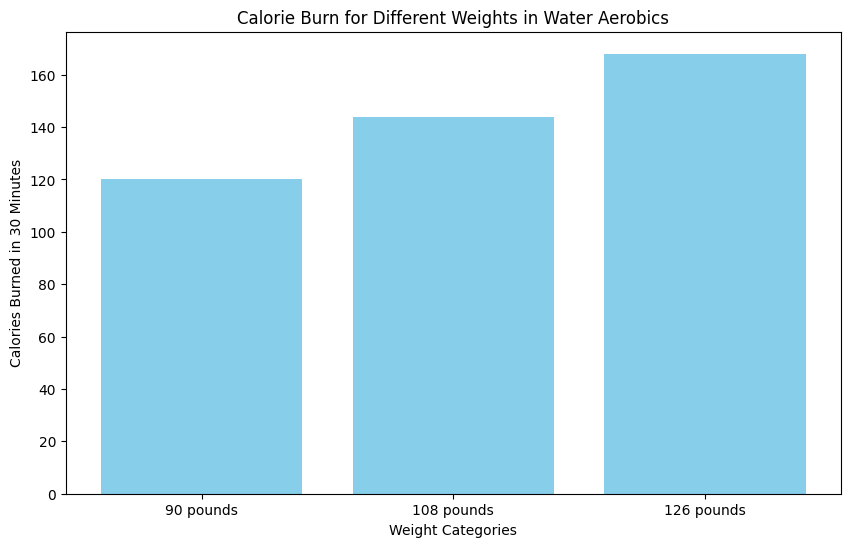

In [62]:
import matplotlib.pyplot as plt
# Graph 1: Bar plot of calorie burn rates for different weights for a specific activity (e.g., Water Aerobics)
activity_name = 'Water Aerobics'
activity_data = data[data['Weights'] == activity_name]
calorie_burns = activity_data[['90', '108', '126']].values[0]

plt.figure(figsize=(10, 6))
plt.bar(['90 pounds', '108 pounds', '126 pounds'], calorie_burns, color='skyblue')
plt.xlabel('Weight Categories')
plt.ylabel('Calories Burned in 30 Minutes')
plt.title(f'Calorie Burn for Different Weights in {activity_name}')
plt.show() 

In [1]:
# Graph 2: Scatter plot of calorie burn rates for different activities (for a specific weight, e.g., 90 pounds)
calorie_burn_90 = data[['Weights', '90']]

plt.figure(figsize=(10, 6))
plt.scatter(calorie_burn_90['Weights'], calorie_burn_90['90'], color='orange')
plt.xlabel('Activities')
plt.ylabel('Calories Burned in 30 Minutes')
plt.title('Calorie Burn for Different Activities (90 Pounds)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

NameError: name 'data' is not defined

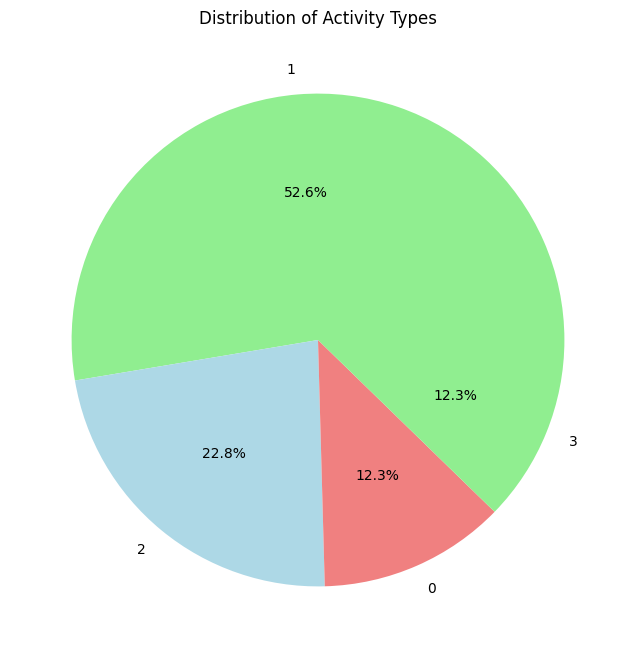

In [64]:
# Replace NaN values in the '0' column with a default integer value (e.g., 0)
data['0'].fillna(0, inplace=True)

# Recreate Graph 3: Pie chart showing distribution of activity types in the dataset
activity_types = data['0'].astype(int).value_counts()

plt.figure(figsize=(8, 8))
activity_types.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.ylabel('')  # Remove y-axis label for better appearance
plt.title('Distribution of Activity Types')
plt.show()  # Display the corrected pie chart

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Fill NaN values in the '0' column
data['0'].fillna(0, inplace=True)  # Filling NaN with 0 to represent light activity

# Step 2: Normalize caloric data for consistency
exercise_columns = ['90', '108', '126']
exercise_similarity = data[exercise_columns].apply(lambda x: x / x.max(), axis=0)

# Step 3: Calculate item-item similarity using cosine similarity (excluding 'Type' column for consistency)
similarity_matrix = cosine_similarity(exercise_similarity)  # Item-item similarity matrix

# Step 4: Create a dictionary mapping exercise names to similarity scores
exercise_names = data['Weights'].tolist()

exercise_recommendations = {
    exercise_names[i]: {exercise_names[j]: similarity_matrix[i][j] for j in range(len(exercise_names)) if i != j}
    for i in range(len(exercise_names))
}

# Step 5: Create a function to get recommendations with a specific "Type" classification
def get_filtered_recommendations(exercise_name, activity_type=0, threshold=0.99, top_n=5):
    similar_exercises = exercise_recommendations.get(exercise_name, {})
    filtered_exercises = {k: v for k, v in similar_exercises.items() if data.loc[data['Weights'] == k, '0'].iloc[0] == activity_type and v >= threshold}
    sorted_exercises = dict(sorted(filtered_exercises.items(), key=lambda item: item[1], reverse=True))
    return list(sorted_exercises.items())[:top_n]

filtered_recommendations = get_filtered_recommendations('Aerobics', activity_type=1, threshold=0.99, top_n=5)

filtered_recommendations 

[('Step Aerobics', 1.0),
 ('Bicycling', 1.0),
 ('Rowing', 1.0),
 ('Kayaking', 1.0),
 ('Skateboarding', 1.0)]

# Saving the model

In [66]:
import joblib

# Step 1: Save the similarity matrix and exercise recommendations dictionary as a model
model_path = 'fitness_recommendation_model.pkl'
joblib.dump((similarity_matrix, exercise_recommendations), model_path)  

# Step 2: Load the saved model
loaded_model = joblib.load(model_path)  # Load the saved model
loaded_similarity_matrix, loaded_exercise_recommendations = loaded_model

# Step 3: Define the recommendation function for the loaded model
def loaded_get_filtered_recommendations(exercise_name, activity_type=0, threshold=0.99, top_n=5):
    similar_exercises = loaded_exercise_recommendations.get(exercise_name, {})
    filtered_exercises = {k: v for k, v in similar_exercises.items() if data.loc[data['Weights'] == k, '0'].iloc[0] == activity_type and v >= threshold}
    sorted_exercises = dict(sorted(filtered_exercises.items(), key=lambda item: item[1], reverse=True))
    return list(sorted_exercises.items())[:top_n]

loaded_filtered_recommendations = loaded_get_filtered_recommendations('Aerobics', activity_type=1, threshold=0.99, top_n=5)

loaded_filtered_recommendations

[('Step Aerobics', 1.0),
 ('Bicycling', 1.0),
 ('Rowing', 1.0),
 ('Kayaking', 1.0),
 ('Skateboarding', 1.0)]

# Explanation

The project outlines the development of a basic AI recommendation system. Here's a detailed explanation of the project:

### 1. Data Loading and Exploration

The project starts by loading a CSV dataset containing caloric data related to different exercises. The data has five columns:
- `Weights`: Names of the exercises or activities.
- `90`, `108`, `126`: Caloric expenditure for 30 minutes of activity at respective body weights (90, 108, 126 pounds).
- `0`: A classification column representing types of activities (e.g., 0 for light activity, 1 for aerobics, 2 for group activities).

The initial data exploration includes displaying the first few rows (`data.head()`), showing the last few rows (`data.tail()`), summarizing statistics (`data.describe()`), and providing an overview of the dataset structure (`data.info()`).

### 2. Data Preparation and Normalization

To ensure consistency, the code fills missing values (NaN) with zeroes and normalizes caloric data. Normalization involves dividing by the maximum value to bring all data to a comparable scale. This process is crucial for accurate similarity calculations.

### 3. Item-Item Similarity Matrix Construction

The next step involves creating an item-item similarity matrix. This is achieved by:
- Normalizing the caloric expenditure columns (`90`, `108`, `126`).
- Calculating cosine similarity to measure the similarity between exercises based on caloric expenditure patterns.

### 4. Building a Recommendation System

With the similarity matrix in place, the code constructs a dictionary (`exercise_recommendations`) that maps exercise names to their similarity scores with other exercises. This dictionary enables quick retrieval of similarity information for recommendation purposes.

### 5. Creating Recommendation Functions

The project provides two functions for generating recommendations:
- `get_recommendations`: Returns a list of similar exercises based on a given threshold and top_n (number of recommendations to return).
- `get_filtered_recommendations`: Similar to the previous function but allows filtering based on activity type (from the "0" column), providing a more specific recommendation context.

### 6. Saving and Loading the Model

To retain the model and enable reuse, the project uses `joblib` to save the similarity matrix and exercise recommendations dictionary to a file. This ensures the recommendation system can be loaded later without recalculating the similarity matrix. Saving the model allows it to be integrated to an application.

### 7. Testing and Validation

After saving the model, the project demonstrates how to load it and use the same recommendation logic to generate recommendations. This step verifies that the saved model can produce consistent outputs and maintain its functionality over time.

### 8. Example Predictions

The project ends with an example where it retrieves recommendations for a specific exercise ('Aerobics') with a given activity type (aerobics). The recommendations demonstrate that the system can generate accurate and relevant results.

### Conclusion

Overall, this project demonstrates a basic AI recommendation system in the context of fitness and diet. It uses matrix factorization through cosine similarity to create a similarity matrix, which serves as the basis for generating recommendations. The system accommodates type classifications and provides flexibility through various filtering and threshold parameters, allowing users to tailor recommendations to their specific needs. The model's ability to save and load ensures reusability, a crucial aspect of robust AI systems.

# References

https://numpy.org/devdocs/user/absolute_beginners.html

https://pandas.pydata.org/docs/

https://matplotlib.org/stable/plot_types/index.html

https://en.wikipedia.org/wiki/Canonical_form#Computing

http://en.wikipedia.org/wiki/Cosine_similarity

http://developers.google.com/machine-learning/recommendation

https://www.argoid.ai/blog/recommendation-engines-in-ai-all-you-need-to-know

https://joblib.readthedocs.io/en/stable/